# Multiple Linear Regression 
The main idea here is pretty simple. Whereas, in simple linear regression we took our dependent variable to be a _function_ only of a single independent variable, here we'll be taking the dependent variable to be a _function_ of multiple independent variables.

Our regression equation, then, instead of looking like $\hat{y} = mx + b$, will now look like:

$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1x_1 + ... + \hat{\beta}_nx_n$.

Remember that the hats ( $\hat{}$ ) indicate parameters that are estimated.

Is this still a best-fit *line*? Well, no. What does the graph of, say, z = x + y look like? [Here's](https://academo.org/demos/3d-surface-plotter/) a 3d-plotter. (Of course, once we get x's with subscripts beyond 2 it's going to be very hard to visualize. But in practice linear regressions can make use of dozens or even of hundreds of independent variables!)

In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#this allows plots to appear directly in the notebook
%matplotlib inline
plt.style.use('fivethirtyeight')

#read data into a DataFrame
data = pd.read_csv('data/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


**What are the features/predictors?**

*TV:* advertising dollars spent on TV for a single product in a given market (in thousands of dollars)

*Radio:* advertising dollars spent on Radio

*Newspaper:* advertising dollars spent on Newspaper

**What is the target?**

*Sales:* sales of a single product in a given market (in thousands of widgets)

### Questions About the Advertising Data

Let's pretend you work for the company that manufactures and markets this widget. The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?

This general question might lead you to more specific questions:

* Is there a relationship between ads and sales?
* How strong is that relationship?
* Which ad types contribute to sales?
* What is the effect of each ad type of sales?
* Given ad spending in a particular market, can sales be predicted?

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

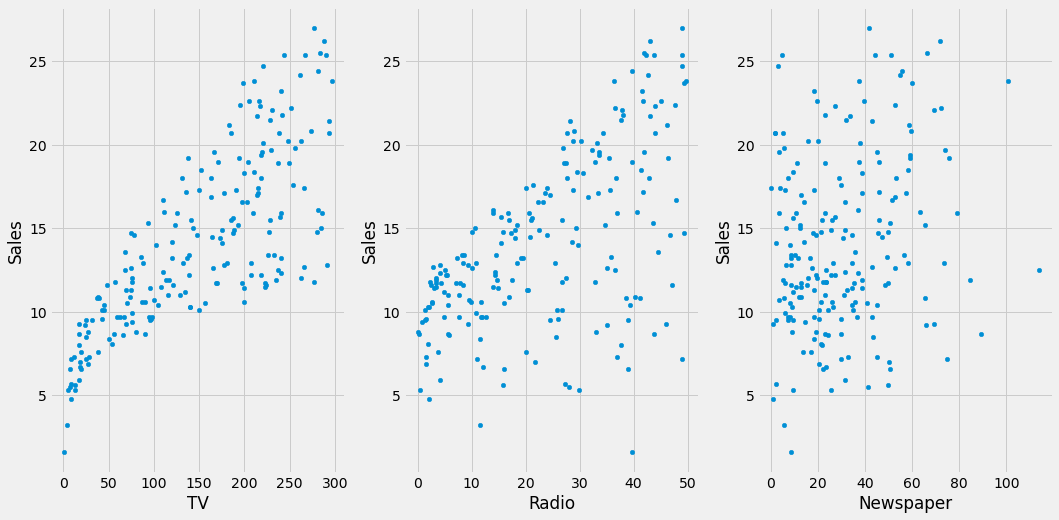

In [3]:
#There are 200 observations, and thus 200 markets in the dataset.
# Visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3,)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

## Simple regression with StatsModels

In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [5]:
f = 'Sales ~ TV'
model = ols(formula=f, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 23 Jun 2021   Prob (F-statistic):           1.47e-42
Time:                        15:10:13   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Let's do it with SKLearn 

In [6]:
#imports 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#create X and y 
features = ['TV']
X = data[features]
y = data.Sales

#instiatiate and fit 
slr = LinearRegression()
slr.fit(X, y)

#print coefficients 
print(slr.intercept_)
print(slr.coef_)

7.032593549127695
[0.04753664]


## Multiple Linear Regression 
We are still predicting a single variable(y) but now we are using multiple features(xs). This introduces several additional complexities but it also provides a great deal of additional flexibility and predictability.

**Examples**: 
* Your Credit score 
* Price of a home 


**Modified formula**:
$$ \hat y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2 x_2 +\ldots + \hat\beta_n x_n $$ 

So, $n$ is the number of predictors, $\beta_0$ is the intercept, and $\hat y$ is the so-called "fitted line" or the predicted value associated with the dependent variable.

In [7]:
#stasmodels
f = 'Sales ~ TV + Radio + Newspaper'
model = ols(formula=f, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 23 Jun 2021   Prob (F-statistic):           1.58e-96
Time:                        15:10:13   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### _Note_: R-squared vs. Adjusted R-squared 
To evaluate the overall fit of a linear model, we use the R-squared value

R-squared is the proportion of variance explained
It is the proportion of variance in the observed data that is explained by the model, or the reduction in error over the null model
The null model just predicts the mean of the observed response, and thus it has an intercept and no slope
R-squared is between 0 and 1
Higher values are better because it means that more variance is explained by the model.

The actual calculation of $R^2$ is:
$\Large R^2\equiv 1-\frac{\Sigma_i(y_i - \hat{y}_i)^2}{\Sigma_i(y_i - \bar{y})^2}$.

$R^2$ is a measure of how much variation is in the dependent variable your model explains.

Adjusted $R^2$
There are some theoretical objections to using $R^2$ as an evaluator of a regression model.

One objection is that, if we add another predictor to our model, $R^2$ can only increase! (It could hardly be that with more features I'd be able to account for less of the variation in the dependent variable than I could with the smaller set of features. We saw this with adding Newspaper ads.)

One improvement is adjusted $R^2$:
$\Large R^2_{adj.}\equiv 1 - \frac{(1 - R^2)(n - 1)}{n - m - 1}$, where:

n is the number of data points; and
m is the number of predictors.
This can be a better indicator of the quality of a regression model.

R-squared will always increase as you add more features to the model, even if they are unrelated to the response
Selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

**Solution**

* Adjusted R-squared
Penalizes model complexity (to control for overfitting), but it generally under-penalizes complexity.

**Better Solution**

* Train/test split or cross-validation
More reliable estimate.
Better for choosing which of your models will best generalize to other data.
There is extensive functionality for cross-validation in scikit-learn, including automated methods for searching different sets of parameters and different models.
Cross-validation can be applied to any model, whereas the methods described above only apply to linear models. 

In [8]:
#sklearn

features = ['TV', 'Radio', 'Newspaper']
X = data[features]
y = data.Sales

mlr = LinearRegression() #instantiate 
mlr.fit(X, y) #fit 

print(mlr.coef_)
print(mlr.score(X,y))
# adjusted R-squared
print(1 - ( 1 - mlr.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 ))

[ 0.04576465  0.18853002 -0.00103749]
0.8972106381789522
0.8956373316204668


In [9]:
list(zip(features, mlr.coef_))

[('TV', 0.0457646454553976),
 ('Radio', 0.18853001691820448),
 ('Newspaper', -0.0010374930424763285)]

> We can use these coeffcients to determine how much money should be spent in a given market to sell a minimum number of widgets. With one additional caveat: 

**We must deal with multicollinearity.** 

## Dealing with Multicollinearity
The interpretation of a regression coefficient is that it represents the average change in the dependent variable for each 1 unit change in a predictor, assuming that all the other predictor variables are kept constant. Multicollinearity occurs when 2 or more of the independent variables are higly correlated with each other.

**How do we tell if variables are correlated with each other?**
1. Look at a scatter matrix 
2. Look at a heatmap 

**The scatter matrix returns scatterplots for relationships between two predictors, and histograms for a single feature on the diagonal.**


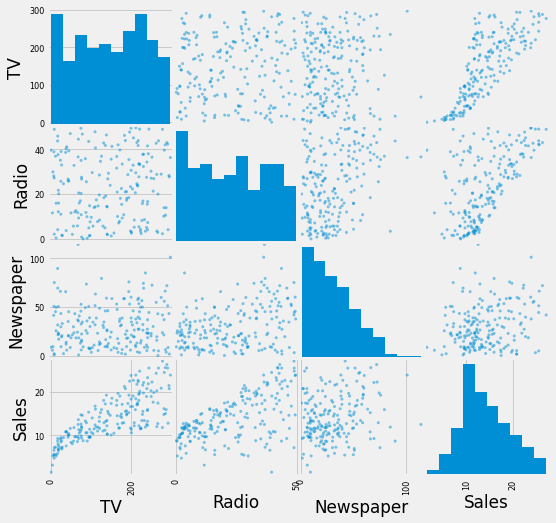

In [10]:
pd.plotting.scatter_matrix(data, figsize=(8,8));
plt.show()

**The heatmap returns a matrix with the pearson correlation coeffcient given for each variable. Typically, we want to drop(or create an interaction) a variable that has a high(.7 or higher) correlation with another predictive feature but a lower correlation with the target.**

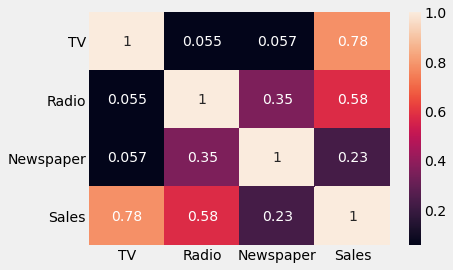

In [11]:
import seaborn as sns
sns.heatmap(data.corr(), annot=True);

## Moving onto Prediction
* How can we tell if our predictions are accurate?
* What is the bias/Variance tradeoff? 
* How can we improve our models performance? 

### Model Validation 
This is the process of controlling over-fitting so our model can generalize well when it receives new data. 

Our model is useless unless it generalizes well when we add new data. But how can we tell if our model is performing well? 

Your model is underfitting the training data when the model performs poorly on the testing data. This is because the model is unable to capture the relationship between the input examples (often called X) and the target values (often called Y). Your model is overfitting your training data when you see that the model performs well on the training data but does not perform well on the evaluation data. This is because the model is memorizing the data it has seen and is unable to generalize to unseen examples.

![](https://docs.aws.amazon.com/machine-learning/latest/dg/images/mlconcepts_image5.png)



### Bias Variance Trade-Off 
Review: 

> **Underfitting** happens when a model cannot learn the training data, nor can it generalize to new data.

> **Overfitting** happens when a model learns the training data too well. In fact, so well that it is not generalizeable to new data

Mathematically, if we look at the equation of MSE(mean of our sum of squared errors)
$\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2$

We can apply bias and variance and it would like this: 

$ MSE = Bias(\hat{f}(x))^2 + Var(\hat{f}(x)) + \sigma^2$

Bias is usually associated with low model complexity, variance with high model complexity. 

![](https://files.ai-pool.com/a/eba93f5a75070f0fbb9d86bec8a009e9.png)

 <details>
    <summary>So, what do you do if you have high bias or variance? </summary>
    
If we had high bias and low variance what should we do?<br/>
- Get rid of outliers 
- Increase model complexity by adding polynomial features and/or interactions 
- Get more features(feature engineering) OR get more data

If we had low bias and high variance what should we do? 
- decrease the complexity 
- reduce the size of your training set
- reduce the amount of features 
- Get rid of outliers 
</details>


### Train/Test Split 
We need to split our data into a training and a testing set, randomly. A 70/30 split is pretty standard but what you choose can depend on the model you are using.  

**To evaluate our training and test sets, we will compare our $\hat y$ with the actual value, $y$.**
 
**Mean Squared Error (MSE)** is the mean of the squared errors:

$\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2$
 
**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:

$\sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2}$

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [13]:
#split our data into training/testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(len(X_train), len(X_test), len(y_train), len(y_test))

150 50 150 50


In [14]:
#instantiate and fit 
mlr_split = LinearRegression()

#fit
mlr_split.fit(X_train, y_train)

# calculate predictions on training and test sets
y_hat_train = mlr_split.predict(X_train)
y_hat_test = mlr_split.predict(X_test)

#compare MSE for the predicted training and test values 
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

print('Train score:', mlr_split.score(X_train, y_train))
print('Test score:', mlr_split.score(X_test, y_test))



Train Mean Squarred Error: 3.086791346829135
Test Mean Squarred Error: 1.9730456202283373
Train score: 0.890307557755665
Test score: 0.9156213613792232


In [18]:
# adjusted R-squared
print(1 - ( 1 - mlr_split.score(X_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y_train) - X_train.shape[1] - 1 ))
print(1 - ( 1 - mlr_split.score(X_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y_test) - X_test.shape[1] - 1 ))

0.8880536034629731
0.9101184066865639


### We need k-fold Cross Validation 
Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The general procedure is as follows:

1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
    * Take the group as a hold out or test data set
    * Take the remaining groups as a training data set
    * Fit a model on the training set and evaluate it on the test set
    * Retain the evaluation score and discard the model
4. Summarize the skill of the model using the sample of model evaluation scores

![](https://miro.medium.com/max/700/1*J2B_bcbd1-s1kpWOu_FZrg.png)

In [15]:
from sklearn.model_selection import cross_val_score

cv_results = cross_val_score(mlr, X, y, cv=5)

cv_results

array([0.87865198, 0.91763212, 0.92933032, 0.81443904, 0.89547829])

### Feature Engineering 

Let's say we want to create a new feature that tells us the size of the market. We could look up our individual markets and research if they are large or small markets based of the demand of our widgets OR do a more detailed analysis of the types of customers that typically buy our widgets and then see if those people exist in our given markets. 

In [16]:
# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(data))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
data['Size'] = 'small'

# Series.loc is a purely label-location based indexer for selection by label
data.loc[mask_large, 'Size'] = 'large'
data.head()

,TV,Radio,Newspaper,Sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


### Categorical Variables

Up to now, all of our features have been numeric. What if one of our features was categorical?

What is a categorical feature? <br/>
**Examples:**
* gender
* region/country
* marital status 
* condition of an item <br/>

[Review: ALL THE VARIABLES](https://www.statisticshowto.com/probability-and-statistics/types-of-variables/)


For scikit-learn, we need to represent all data numerically.

If the feature only has two categories, we can simply create a dummy variable that represents the categories as a binary value, 1 or 0


In [19]:
# Manually - create a new Series called Size_large
data['Size_large'] = data['Size'].map({'small':0, 'large':1})
data.head()

,TV,Radio,Newspaper,Sales,Size,Size_large
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


In [ ]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper', 'Size_large']
X_2 = data[feature_cols]
y_2 = data.Sales


In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, random_state=1)
print(len(X_train_2), len(X_test_2), len(y_train_2), len(y_test_2))

In [ ]:
#instantiate and fit 
mlr_split_2 = LinearRegression()

#fit
mlr_split_2.fit(X_train_2, y_train_2)

# calculate predictions on training and test sets
y_hat_train_2 = mlr_split_2.predict(X_train_2)
y_hat_test_2 = mlr_split_2.predict(X_test_2)

#compare MSE for the predicted training and test values 
train_mse_2 = mean_squared_error(y_train_2, y_hat_train_2)
test_mse_2 = mean_squared_error(y_test_2, y_hat_test_2)
print('Train Mean Squarred Error:', train_mse_2)
print('Test Mean Squarred Error:', test_mse_2)

print('Train score:', mlr_split_2.score(X_train_2, y_train_2))
print('Test score:', mlr_split_2.score(X_test_2, y_test_2))

So, if that new feature didn't help us at all. Let's try again.
Let's create a new feature called Area, and assign observations to be rural, suburban, or urban

In [20]:
# set a seed for reproducibility
np.random.seed(123456)

# assign roughly one third of observations to each group
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['Area'] = 'rural'
# Series.loc is a purely label-location based indexer for selection by label
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

,TV,Radio,Newspaper,Sales,Size,Size_large,Area
1,230.1,37.8,69.2,22.1,large,1,rural
2,44.5,39.3,45.1,10.4,small,0,urban
3,17.2,45.9,69.3,9.3,small,0,rural
4,151.5,41.3,58.5,18.5,small,0,urban
5,180.8,10.8,58.4,12.9,large,1,suburban


#### Encoding Differences 
1. **Integer Encoding:** encodes the values as integer.
    - Problem if data is not ordinal.
2. **One-Hot Encoding:** encodes the values as a binary vector array.
    - With One-Hot Encoding, the binary vector arrays representation allows a machine learning algorithm to leverage the information contained in a category value without the confusion caused by ordinality.
3. **Dummy Variable Encoding:** same as One-Hot Encoding, but one less column.
    - Solves dummy variable trap but doesn't allow for maintaining data integry when we train/test split 

In [21]:
# label encoding the data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 

In [24]:
pd.get_dummies(data, columns=['Area'], drop_first=True)

,TV,Radio,Newspaper,Sales,Size,Size_large,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,1,0,0
2,44.5,39.3,45.1,10.4,small,0,0,1
3,17.2,45.9,69.3,9.3,small,0,0,0
4,151.5,41.3,58.5,18.5,small,0,0,1
5,180.8,10.8,58.4,12.9,large,1,1,0
...,...,...,...,...,...,...,...,...
196,38.2,3.7,13.8,7.6,small,0,1,0
197,94.2,4.9,8.1,9.7,small,0,0,1
198,177.0,9.3,6.4,12.8,small,0,1,0
199,283.6,42.0,66.2,25.5,small,0,0,0
